In [198]:
import FinanceDataReader as fdr 
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import numpy as np

In [199]:
kospi= fdr.DataReader("KS11","2015")
kospi.head()

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2015-01-02,1926.44,1914.24,1929.15,1909.67,258780000.0,0.0057
2015-01-05,1915.75,1921.96,1921.96,1903.37,313440000.0,-0.0055
2015-01-06,1882.45,1895.48,1900.02,1877.38,303690000.0,-0.0174
2015-01-07,1883.83,1878.90,1887.60,1876.27,280510000.0,0.0007
2015-01-08,1904.65,1895.85,1907.23,1891.77,262210000.0,0.0111


In [201]:
sp = fdr.DataReader("US500","2015")
sp.head()

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2015-01-02,2058.20,2058.90,2072.36,2046.04,0.0,-0.0003
2015-01-05,2020.58,2054.44,2054.44,2017.34,0.0,-0.0183
2015-01-06,2002.61,2022.15,2030.25,1992.44,0.0,-0.0089
2015-01-07,2025.90,2005.55,2029.61,2005.55,0.0,0.0116
2015-01-08,2062.14,2030.61,2064.08,2030.61,0.0,0.0179


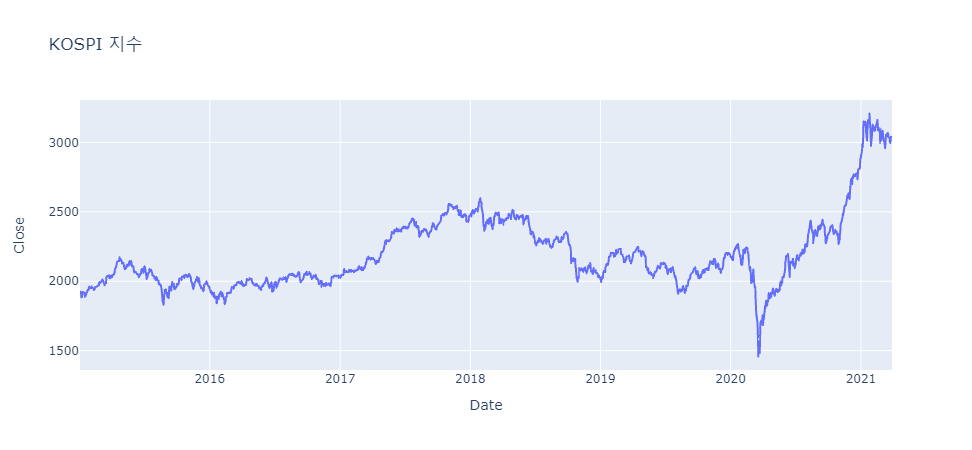

In [202]:
px.line(kospi, y="Close", title = "KOSPI 지수")

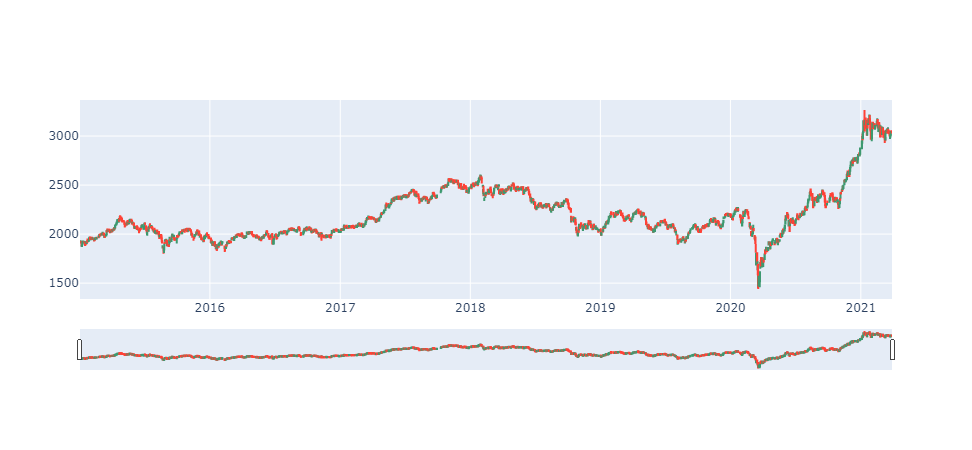

In [203]:
fig_kospi = go.Figure(data=[go.Candlestick(x=kospi.index,
                                    open = kospi["Open"],
                                    high = kospi["High"],
                                    low = kospi["Low"],
                                    close = kospi["Close"]
                                    )])
fig_kospi.show()

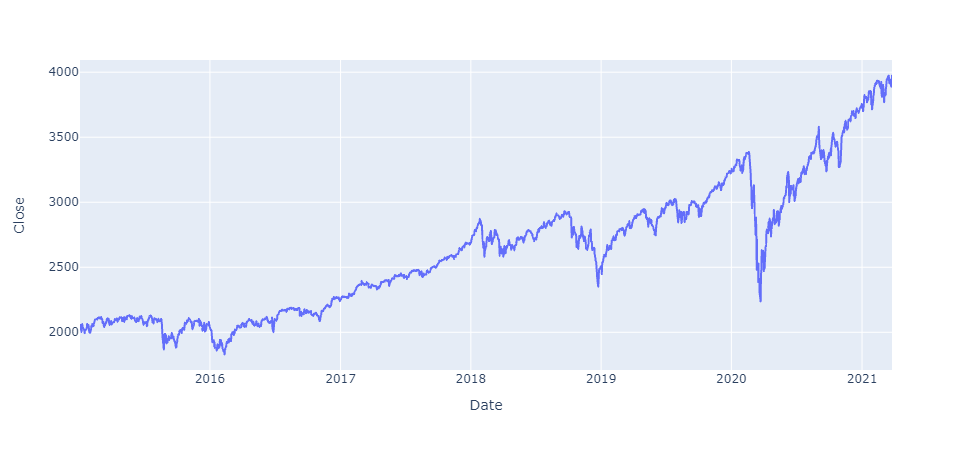

In [204]:
px.line(sp,y="Close")

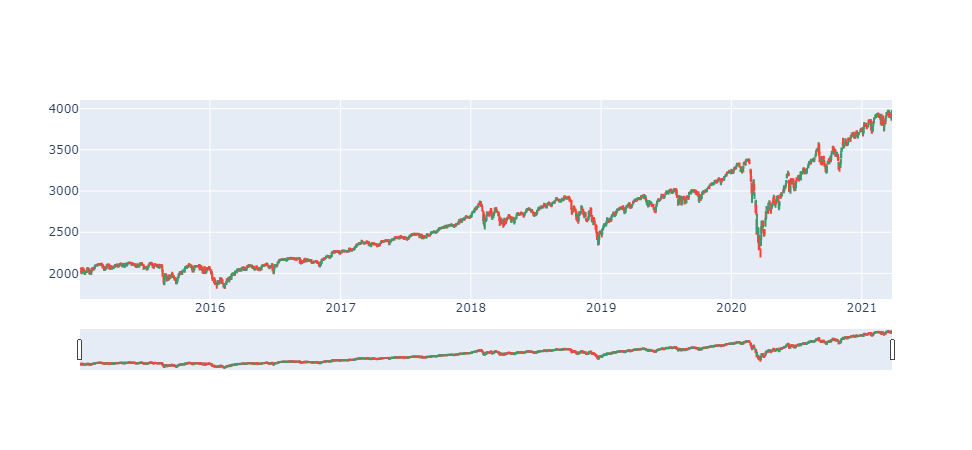

In [224]:
fig_sp = go.Figure(data=[go.Candlestick(x=sp.index,
                                    open = sp["Open"],
                                    high = sp["High"],
                                    low = sp["Low"],
                                    close = sp["Close"]
                                    )])
fig_sp.show()

In [206]:
code_list = ["KS11","US500"]
index_list = [fdr.DataReader(code, "2015")["Close"] for code in code_list]
ks_sp =pd.concat(index_list,axis=1)


In [207]:
ks_sp.columns = code_list
ks_sp.columns

Index(['KS11', 'US500'], dtype='object')

In [208]:
ks_sp

,KS11,US500
Date,,
2015-01-02,1926.44,2058.20
2015-01-05,1915.75,2020.58
2015-01-06,1882.45,2002.61
2015-01-07,1883.83,2025.90
2015-01-08,1904.65,2062.14
...,...,...
2021-03-23,3004.74,3910.52
2021-03-24,2996.35,3889.14
2021-03-25,3008.33,3909.52


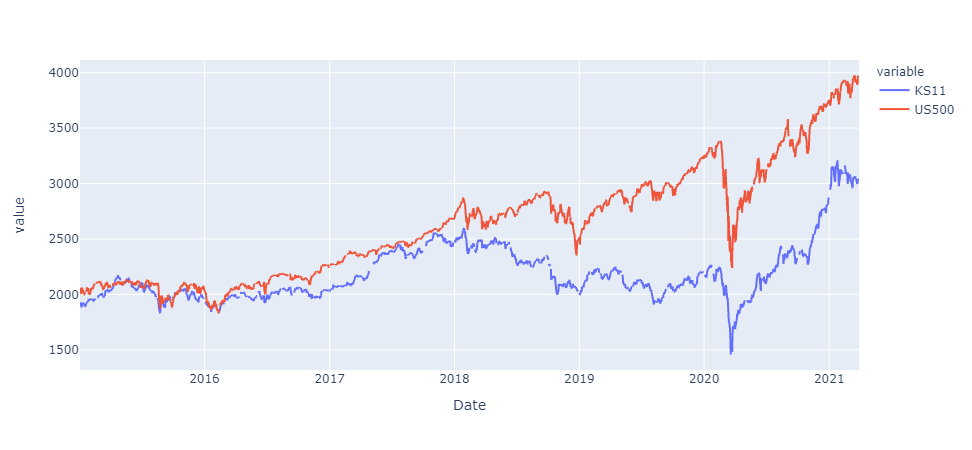

In [209]:
px.line(ks_sp)

In [210]:
df = fdr.DataReader('BTC/KRW')
df.head()

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2017-05-23,3206000,3104000,3281000,3081000,21580.0,0.0329
2017-05-24,4175000,3206000,4314000,3206000,34680.0,0.3022
2017-05-25,4199000,4175000,4840000,3102000,35910.0,0.0057
2017-05-26,3227000,4199000,4200000,2900000,36650.0,-0.2315
2017-05-27,3152000,3227000,3288000,2460000,33750.0,-0.0232


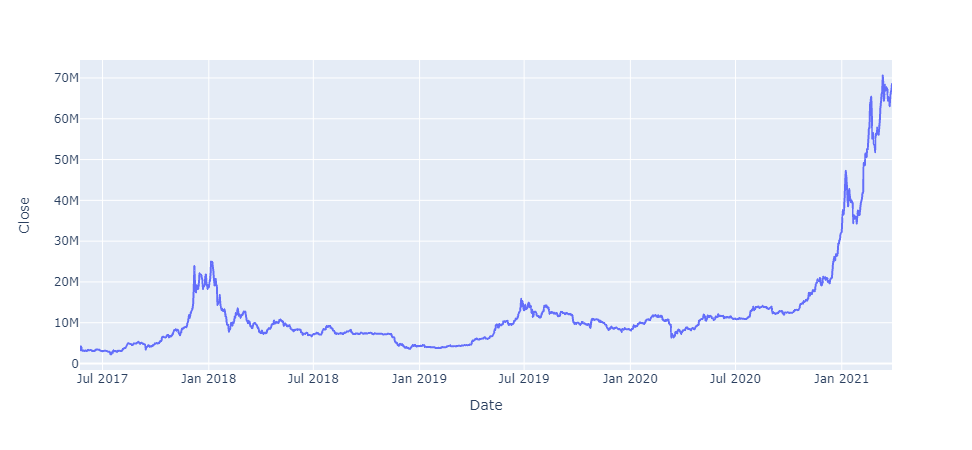

In [211]:
px.line(df,y="Close")

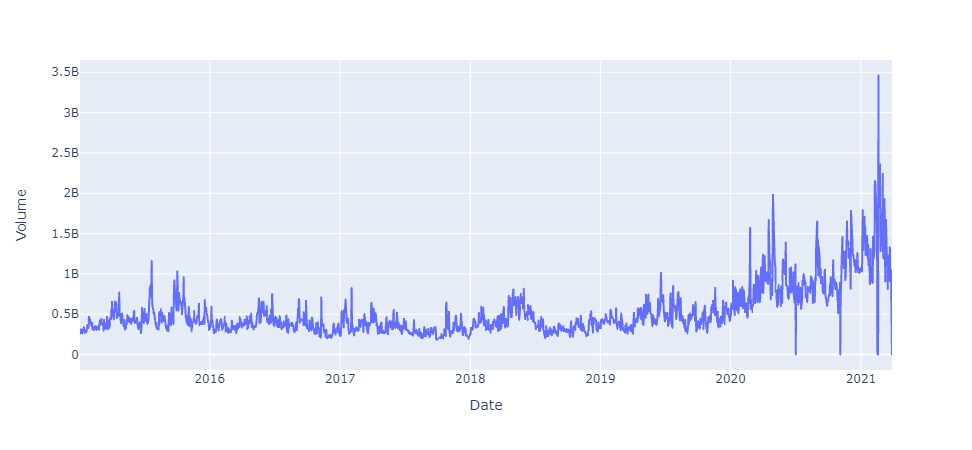

In [212]:
px.line(kospi,y="Volume")

In [242]:
sp_volume = pd.read_csv("s&p_volume.csv")

In [244]:
sp_re = pd.DataFrame(sp_volume[::-1])

In [245]:
sp_re

,Unnamed: 0,0
1568,1568,"2,708,700,000"
1567,1567,"3,799,120,000"
1566,1566,"4,460,110,000"
1565,1565,"3,805,480,000"
1564,1564,"3,934,010,000"
...,...,...
4,4,"4,311,380,000"
3,3,"4,645,340,000"
2,2,"4,766,990,000"
1,1,"4,940,800,000"


In [248]:
volume = pd.DataFrame(sp_re["0"])

In [249]:
def remove_comma(x):
    return x.replace(',', '')
 
volume['0'] = volume['0'].apply(remove_comma)

In [250]:
volume = volume['0'].astype(np.float64)
print(volume)
print(volume.dtypes)

1568    2.708700e+09
1567    3.799120e+09
1566    4.460110e+09
1565    3.805480e+09
1564    3.934010e+09
            ...     
4       4.311380e+09
3       4.645340e+09
2       4.766990e+09
1       4.940800e+09
0       5.467850e+09
Name: 0, Length: 1569, dtype: float64
float64


In [ ]:
sp.drop("Volume",axis=1, inplace= True)

In [252]:
volume_df=pd.DataFrame(volume)

In [253]:
sp_df = pd.merge(sp, volume_df, on= sp.index)

In [254]:
sp_df.set_index('key_0',inplace=True)

In [255]:
sp_df.columns = ['Close', 'Open', 'High', 'Low', 'Change', 'Volume']

In [256]:
sp_df.index.name = "Date"
sp_df

,Close,Open,High,Low,Change,Volume
Date,,,,,,
2015-01-02,2058.20,2058.90,2072.36,2046.04,-0.0003,2.708700e+09
2015-01-05,2020.58,2054.44,2054.44,2017.34,-0.0183,3.799120e+09
2015-01-06,2002.61,2022.15,2030.25,1992.44,-0.0089,4.460110e+09
2015-01-07,2025.90,2005.55,2029.61,2005.55,0.0116,3.805480e+09
2015-01-08,2062.14,2030.61,2064.08,2030.61,0.0179,3.934010e+09
...,...,...,...,...,...,...
2021-03-22,3940.59,3916.48,3955.31,3914.16,0.0070,4.311380e+09
2021-03-23,3910.52,3937.60,3949.13,3901.57,-0.0076,4.645340e+09
2021-03-24,3889.14,3919.93,3942.08,3889.07,-0.0055,4.766990e+09


In [257]:
kospi["Volume"]

Date
2015-01-02    2.587800e+08
2015-01-05    3.134400e+08
2015-01-06    3.036900e+08
2015-01-07    2.805100e+08
2015-01-08    2.622100e+08
                  ...     
2021-03-23    1.330000e+09
2021-03-24    9.784300e+08
2021-03-25    9.403500e+08
2021-03-26    1.040000e+09
2021-03-29    1.270000e+06
Name: Volume, Length: 1533, dtype: float64

In [258]:
sp_df["Volume"]

Date
2015-01-02    2.708700e+09
2015-01-05    3.799120e+09
2015-01-06    4.460110e+09
2015-01-07    3.805480e+09
2015-01-08    3.934010e+09
                  ...     
2021-03-22    4.311380e+09
2021-03-23    4.645340e+09
2021-03-24    4.766990e+09
2021-03-25    4.940800e+09
2021-03-26    5.467850e+09
Name: Volume, Length: 1569, dtype: float64